In [1]:
import argparse
import os 
import sys



ROOT = os.path.abspath('../')
sys.path.append(ROOT)

from imagenet.imagenet_train import train
from imagenet.visualize import visualize_model
from imagenet.inference import ImageClassification
from ocr_tools.craft_ocr.test import start_craft

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib as mpl
import cv2

In [2]:
import sys 
print(sys.path)

['/Users/dmitry/Documents/Business/Projects/Upwork/SportLabels/code/notebooks', '/Users/dmitry/Documents/Development/models/research/object_detection', '/Users/dmitry/Documents/Development/models/research/slim', '/Users/dmitry/Documents/Development/models/research', '/Users/dmitry/anaconda3/envs/pytorch/lib/python36.zip', '/Users/dmitry/anaconda3/envs/pytorch/lib/python3.6', '/Users/dmitry/anaconda3/envs/pytorch/lib/python3.6/lib-dynload', '', '/Users/dmitry/.local/lib/python3.6/site-packages', '/Users/dmitry/anaconda3/envs/pytorch/lib/python3.6/site-packages', '/Users/dmitry/anaconda3/envs/pytorch/lib/python3.6/site-packages/IPython/extensions', '/Users/dmitry/.ipython', '/Users/dmitry/Documents/Business/Projects/Upwork/SportLabels/code']


In [4]:
import argparse

parser = argparse.ArgumentParser(
   description='Text Reader')

parser.add_argument('command',
                metavar='<command>',
                help="'train, detect, evaluate'")


parser.add_argument('--device')
parser.add_argument('--network')
parser.add_argument('--weights')
parser.add_argument('--save_weights')
parser.add_argument('--folder_path')

parser.add_argument('--trained_model', default=os.path.join(ROOT, 'ocr_tools/craft_ocr/weights/craft_mlt_25k.pth'), type=str, help='pretrained model')
parser.add_argument('--text_threshold', default=0.7, type=float, help='text confidence threshold')
parser.add_argument('--low_text', default=0.4, type=float, help='text low-bound score')
parser.add_argument('--link_threshold', default=0.4, type=float, help='link confidence threshold')
parser.add_argument('--cuda', default=False, help='Use cuda for inference')
parser.add_argument('--canvas_size', default=1280, type=int, help='image size for inference')
parser.add_argument('--mag_ratio', default=1.5, type=float, help='image magnification ratio')
parser.add_argument('--poly', default=False, action='store_true', help='enable polygon type')
parser.add_argument('--show_time', default=False, action='store_true', help='show processing time')
parser.add_argument('--test_folder', default='/data/', type=str, help='folder path to input images')
parser.add_argument('--refine', default=False, action='store_true', help='enable link refiner')
parser.add_argument('--refiner_model', default='weights/craft_refiner_CTW1500.pth', type=str,
                    help='pretrained refiner model')
parser.add_argument('--image_folder', default='lol', help='path to image_folder which contains text images')
parser.add_argument('--workers', type=int, help='number of data loading workers', default=4)
parser.add_argument('--batch_size', type=int, default=192, help='input batch size')
parser.add_argument('--saved_model', help="path to saved_model to evaluation",
                    default=os.path.join(ROOT,'ocr_tools/craft_ocr/weights/TPS-ResNet-BiLSTM-Attn.pth'))

parser.add_argument('--batch_max_length', type=int, default=25, help='maximum-label-length')
parser.add_argument('--imgH', type=int, default=32, help='the height of the input image')
parser.add_argument('--imgW', type=int, default=100, help='the width of the input image')
parser.add_argument('--rgb', action='store_true', help='use rgb input')
parser.add_argument('--character', type=str, default='0123456789abcdefghijklmnopqrstuvwxyz', help='character label')
parser.add_argument('--sensitive', action='store_true', help='for sensitive character mode')
parser.add_argument('--PAD', action='store_true', help='whether to keep ratio then pad for image resize')

parser.add_argument('--Transformation', type=str, help='Transformation stage. None|TPS', default='TPS')
parser.add_argument('--FeatureExtraction', type=str, help='FeatureExtraction stage. VGG|RCNN|ResNet',
                    default='ResNet')
parser.add_argument('--SequenceModeling', type=str, help='SequenceModeling stage. None|BiLSTM', default='BiLSTM')
parser.add_argument('--Prediction', type=str, help='Prediction stage. CTC|Attn', default='Attn')
parser.add_argument('--num_fiducial', type=int, default=20, help='number of fiducial points of TPS-STN')
parser.add_argument('--input_channel', type=int, default=1, help='the number of input channel of Feature extractor')
parser.add_argument('--output_channel', type=int, default=512,
                    help='the number of output channel of Feature extractor')
parser.add_argument('--hidden_size', type=int, default=256, help='the size of the LSTM hidden state')

args = parser.parse_args("process \
       --folder_path={0}/imagenet/data/test  \
       --device=cpu \
       --weights={0}/imagenet/weights/model_final.pth \
       --test_folder={0}/imagenet/data/test".format(ROOT).split())


In [5]:
im = ImageClassification(args.folder_path)
im.start(args.device, args.weights)
start_craft(args, ROOT)

box /Users/dmitry/Documents/Business/Projects/Upwork/SportLabels/code/imagenet/data/test/217.jpg
box /Users/dmitry/Documents/Business/Projects/Upwork/SportLabels/code/imagenet/data/test/216.jpg
box /Users/dmitry/Documents/Business/Projects/Upwork/SportLabels/code/imagenet/data/test/211.jpg
box /Users/dmitry/Documents/Business/Projects/Upwork/SportLabels/code/imagenet/data/test/210.jpg
size /Users/dmitry/Documents/Business/Projects/Upwork/SportLabels/code/imagenet/data/test/288.jpg
size /Users/dmitry/Documents/Business/Projects/Upwork/SportLabels/code/imagenet/data/test/289.jpg
size /Users/dmitry/Documents/Business/Projects/Upwork/SportLabels/code/imagenet/data/test/503.jpg
size /Users/dmitry/Documents/Business/Projects/Upwork/SportLabels/code/imagenet/data/test/298.jpg
size /Users/dmitry/Documents/Business/Projects/Upwork/SportLabels/code/imagenet/data/test/294.jpg
box /Users/dmitry/Documents/Business/Projects/Upwork/SportLabels/code/imagenet/data/test/219.jpg
Load Mask RCNN
Loading we

## Mask RCNN Debuging

In [5]:
from mask_rcnn.inference import Mask_RCNN_detector

In [6]:
mask_rcnn = Mask_RCNN_detector('cpu',ROOT)

Load Mask RCNN


In [162]:
image = cv2.imread('images/210.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [163]:
boxes, mask = mask_rcnn.detection(image,'cpu')
mask

Process Mask RCNN and cropp images
Instances(num_instances=1, image_height=750, image_width=750, fields=[pred_boxes: Boxes(tensor([[376.7967, 459.5078, 727.4902, 561.1198]])), scores: tensor([1.0000]), pred_classes: tensor([0]), pred_masks: tensor([[[False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         ...,
         [False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False]]])])


array([[[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]]])

In [5]:
visMask = (mask * 255).astype("uint8")

NameError: name 'mask' is not defined

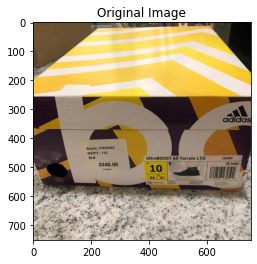

In [165]:
plt.imshow(image)
plt.title('Original Image')
plt.show()

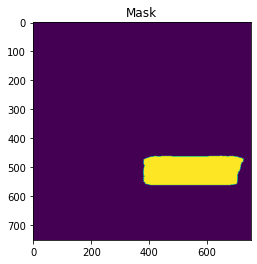

In [166]:
visMask = visMask.reshape(visMask.shape[1],visMask.shape[2])
plt.imshow(visMask)
plt.title('Mask')
plt.show()

379 460
x:379, y:460, width:346, height:101


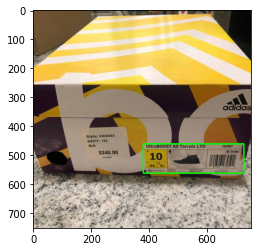

In [167]:
x, y, w, h = cv2.boundingRect(visMask)
print(x,y)
rect1 = cv2.rectangle(image.copy(),(x,y),(x+w,y+h),(0,255,0),3) # not copying here will throw an error
print("x:{0}, y:{1}, width:{2}, height:{3}".format(x, y, w, h))
plt.imshow(rect1)
plt.show()

In [168]:
contours, hierarchy = cv2.findContours(visMask.copy(), 1, 1) # not copying here will throw an error
rect = cv2.minAreaRect(contours[0]) # basically you can feed this rect into your classifier
(x,y),(w,h), a = rect # a - angle

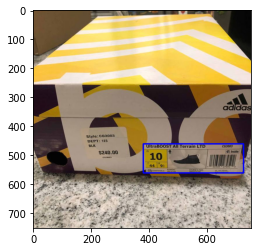

In [169]:
box = cv2.boxPoints(rect)
box = np.int0(box) #turn into ints
rect2 = cv2.drawContours(image.copy(),[box],0,(0,0,255),3)

plt.imshow(rect2)
plt.show()

In [171]:
roi_corners = np.array([box], dtype=np.int32)

In [176]:
cropped = image[box[1][1]:box[3][1], box[0][0]:box[2][0]]
# grayimage[ext_top[1]:ext_bot[1], ext_left[0]:ext_right[0]]

In [161]:
image.shape

(750, 750, 3)

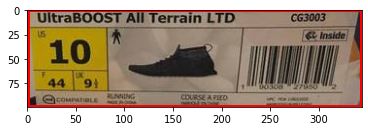

In [177]:
plt.imshow(cropped)
plt.show()